In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pathlib import Path
# from glob import glob

from utils import *

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
by_merge_map = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T', 30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z', 36:'a', 37:'b', 38:'d', 39:'e', 40:'f', 41:'g', 42:'h', 43:'n', 44:'q', 45:'r', 46:'t'}
rev_merge_map = dict((v,k) for k,v in by_merge_map.items())

In [5]:
root_path, data_path = get_root_path('mnist_portfolio')
root_path

paths = data_path.glob('*class*.csv')




In [6]:
raw_data_path = data_path / 'versaler_raw'
raw_data_path

WindowsPath('d:/Git/10_Avancerad dataanalys med portfolioprojekt/mnist_portfolio/data/versaler_raw')

In [7]:
raw_data_path.glob('*.zip')

<generator object Path.glob at 0x0000017E7EE6DC40>

In [43]:
import zipfile
from PIL import Image
from io import StringIO, TextIOWrapper,BytesIO
import shutil


encoding = 'utf-8'
data = np.array
for i,p in enumerate(raw_data_path.glob('*.zip')):
    archive = zipfile.ZipFile(p, mode='r')
    files = archive.namelist()
    for e,f in enumerate(files):
        
        if '.jpg' in f :
            
            img = archive.read(f)
            img = np.transpose(np.array(Image.open(BytesIO(img)),dtype='int'))
            img = img.reshape(-1)
            
            if not 'rensade' in f.lower() and not 'gemener' in f.lower():
                if i+e == 0:
                    data = np.hstack([rev_merge_map[f.split('_', 1)[0]], img])
                else:
                    data = np.vstack([data, np.hstack([rev_merge_map[f.split('_', 1)[0]], img])])
                
                print(f, 'standard', len(data))
            else:
                
                if i+e == 0:
                    data_rem = np.hstack([rev_merge_map[f.split('_', 1)[0]], img])
                else:
                    data_rem = np.vstack([data_rem, np.hstack([rev_merge_map[f.split('_', 1)[0]], img])])
                print(f, 'rensade', len(data_rem))


    
    # if '2' in f: break
    

A_Rensad/A_0_lett.jpg standard 785
A_Rensad/A_1_lett.jpg standard 2
A_Rensad/A_10_lett.jpg standard 3
A_Rensad/A_100_lett.jpg standard 4
A_Rensad/A_1000_lett.jpg standard 5
A_Rensad/A_1001_lett.jpg standard 6
A_Rensad/A_1002_lett.jpg standard 7
A_Rensad/A_1003_lett.jpg standard 8
A_Rensad/A_1004_lett.jpg standard 9
A_Rensad/A_1005_lett.jpg standard 10
A_Rensad/A_1006_lett.jpg standard 11
A_Rensad/A_1007_lett.jpg standard 12
A_Rensad/A_1008_lett.jpg standard 13
A_Rensad/A_1009_lett.jpg standard 14
A_Rensad/A_101_lett.jpg standard 15
A_Rensad/A_1010_lett.jpg standard 16
A_Rensad/A_1011_lett.jpg standard 17
A_Rensad/A_1012_lett.jpg standard 18
A_Rensad/A_1013_lett.jpg standard 19
A_Rensad/A_1014_lett.jpg standard 20
A_Rensad/A_1015_lett.jpg standard 21
A_Rensad/A_1016_lett.jpg standard 22
A_Rensad/A_1017_lett.jpg standard 23
A_Rensad/A_1018_lett.jpg standard 24
A_Rensad/A_1019_lett.jpg standard 25
A_Rensad/A_102_lett.jpg standard 26
A_Rensad/A_1020_lett.jpg standard 27
A_Rensad/A_1021_let

In [44]:
np.unique(data[:,0], return_counts=True)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35]),
 array([2395, 2392, 2388, 2376, 2396, 2259, 2374, 2387, 2376, 2247, 2394,
        5671, 2400, 2400, 2400, 2400, 2387, 2400, 2389, 2382, 2392, 2362,
        2372, 2346, 2351, 2381], dtype=int64))

In [45]:
np.asarray(data_rem).shape

(15570, 785)

In [46]:
np.savetxt(data_path / 'Rensade_med_balanced_L.csv', data, delimiter=",", fmt='%d')



In [47]:
np.savetxt(data_path / 'Bort_sorterade_med_balanced_L.csv', data_rem, delimiter=",", fmt='%dd')

In [48]:
x, y = gen_sets(data_path / 'Rensade_med_balanced_L.csv')

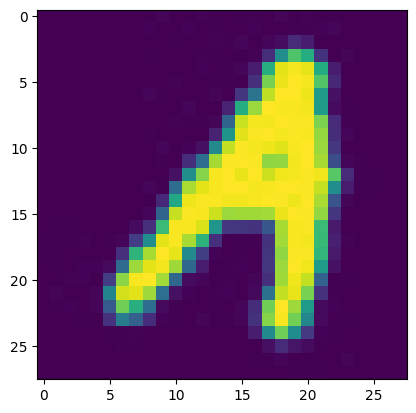

In [49]:
plt.imshow(x[0])